In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


input/fer2013.csv


In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras.utils import np_utils

In [5]:
df = pd.read_csv('input/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [7]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [8]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

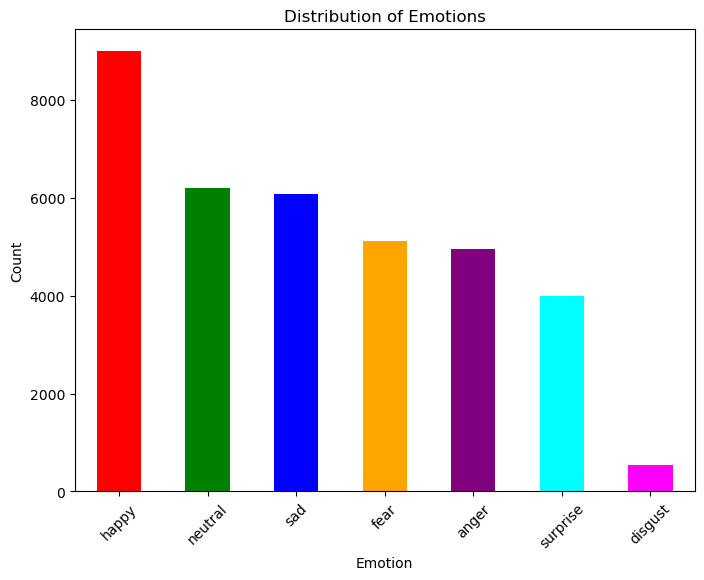

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
emotion_counts = df['emotion'].value_counts()

# Define colors for each emotion
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

# Define emotion labels
emotion_labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

# Map numeric labels to emotion names
emotion_counts.index = emotion_counts.index.map(emotion_labels)

# Create a bar plot
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

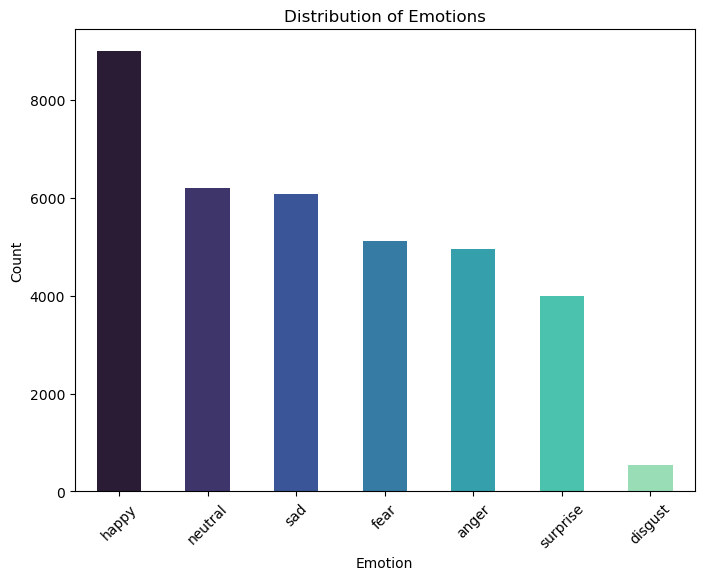

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
emotion_counts = df['emotion'].value_counts()

# Define colors using the "rocket" palette from Seaborn
colors = sns.color_palette("mako", len(emotion_counts))

# Define emotion labels
emotion_labels = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

# Map numeric labels to emotion names
emotion_counts.index = emotion_counts.index.map(emotion_labels)

# Create a bar plot with colors from the "rocket" palette
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [10]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

/var/folders/z3/_lf6f9cj6bx9_46lj_sjr11w0000gn/T/ipykernel_62914/2088611314.py:15: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


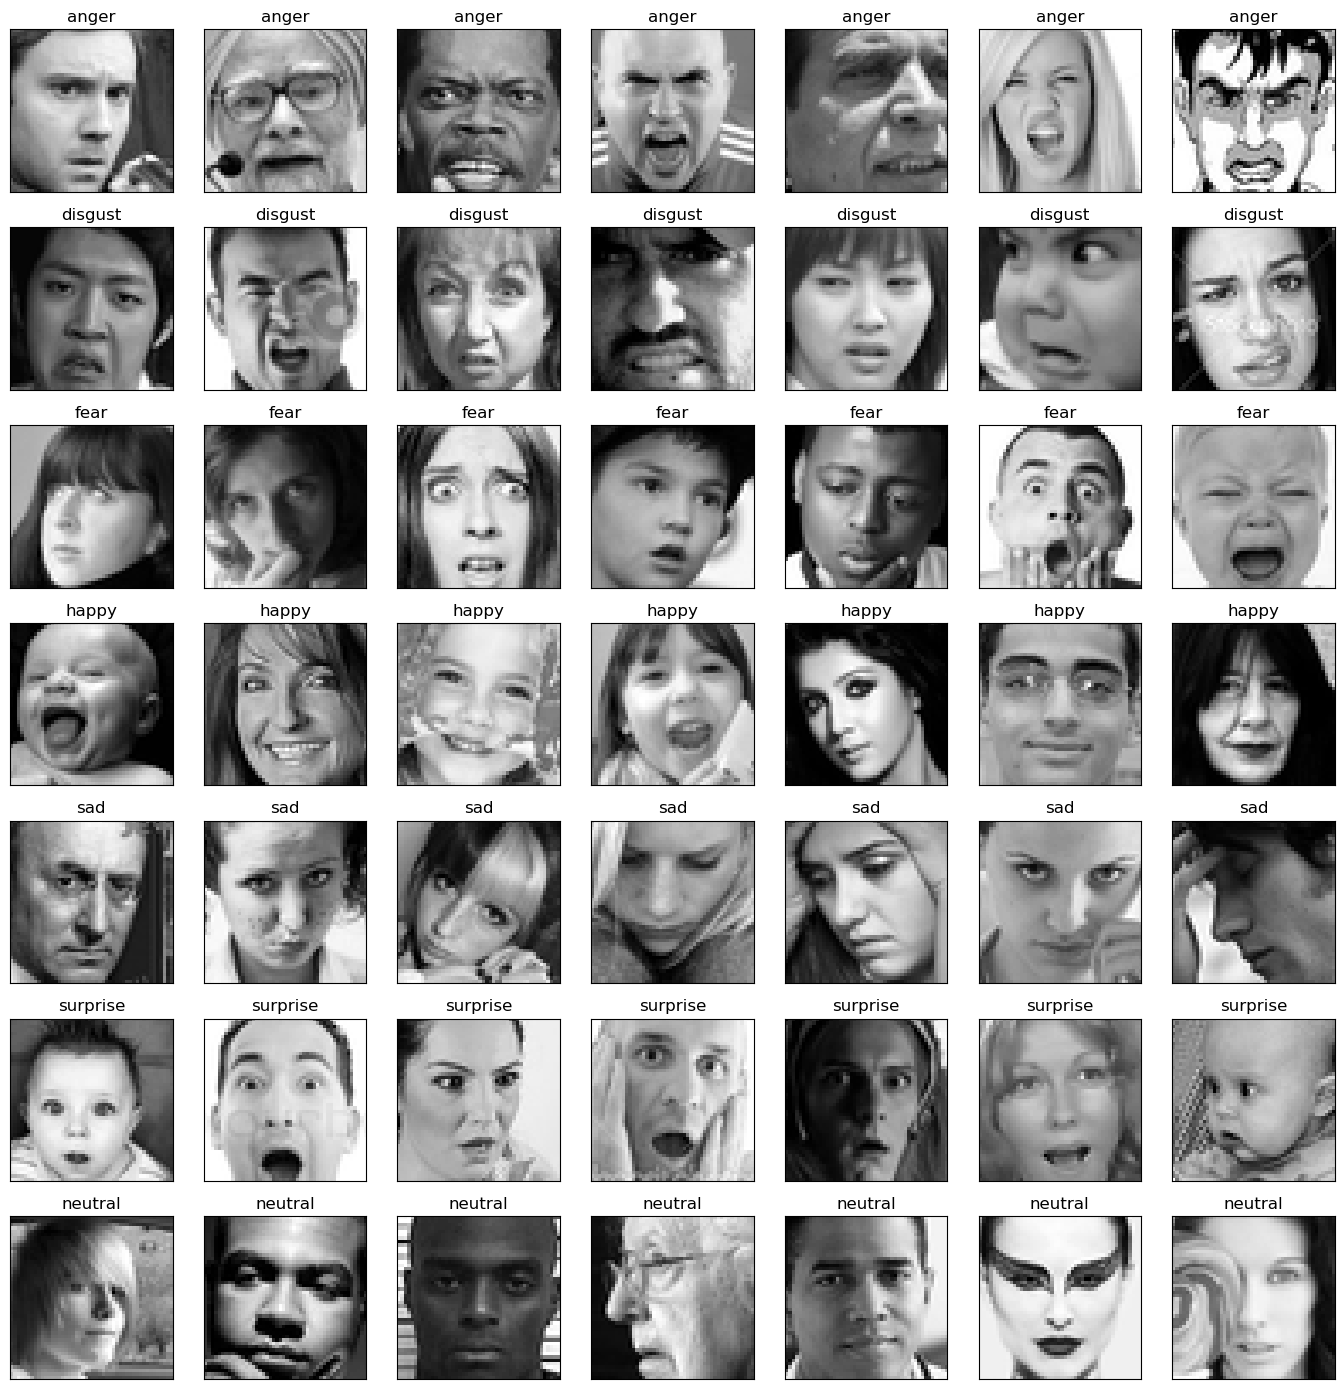

In [11]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

In [12]:
img_array = df_over.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [13]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [14]:
count_0, count_1, count_2, count_3, count_4, count_5, count_6 = df.emotion.value_counts()

df_0 = df[df["emotion"] == 0]
df_1 = df[df["emotion"] == 1]
df_2 = df[df["emotion"] == 2]
df_3 = df[df["emotion"] == 3]
df_4 = df[df["emotion"] == 4]
df_5 = df[df["emotion"] == 5]
df_6 = df[df["emotion"] == 6]

In [15]:
print(count_0)

8989


In [16]:
print(count_1)

6198


In [17]:
print(count_2)

6077


In [18]:
print(count_3)

5121


In [19]:
df_0.emotion.value_counts()

emotion
0    4953
Name: count, dtype: int64

In [20]:
df_1_over = df_1.sample(count_0, replace = True)
df_2_over = df_2.sample(count_0, replace = True)
df_0_over = df_0.sample(count_0, replace = True)
df_4_over = df_4.sample(count_0, replace = True)
df_5_over = df_5.sample(count_0, replace = True)
df_6_over = df_6.sample(count_0, replace = True)

In [21]:
df_over = pd.concat([df_0_over , df_1_over , df_2_over , df_3, df_4_over , df_5_over, df_6_over], axis = 0)
print(df_over.emotion.value_counts())

emotion
0    8989
1    8989
2    8989
3    8989
4    8989
5    8989
6    8989
Name: count, dtype: int64


In [25]:
img_array = df_over.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [26]:
img_array.shape

(62923, 48, 48, 1)

In [27]:
from keras.utils import to_categorical
le = LabelEncoder()
img_labels = le.fit_transform(df_over.emotion)
img_labels = to_categorical(img_labels)
img_labels.shape

(62923, 7)

In [28]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,shuffle=True, stratify=img_labels,test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((50338, 48, 48, 1), (12585, 48, 48, 1), (50338, 7), (12585, 7))

In [30]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [31]:
X_train = X_train / 255.
X_valid = X_valid / 255.

In [32]:
def build_net(optim):
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [33]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [37]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

model = build_net(optims[1]) 
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    callbacks=callbacks,
#     use_multiprocessing=True
)

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 6011s 4s/step - accuracy: 0.1918 - loss: 2.3136 - val_accuracy: 0.3878 - val_loss: 1.5983 - learning_rate: 0.0010
Epoch 2/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:34 480ms/step - accuracy: 0.2500 - loss: 1.7785

2024-05-02 21:41:56.789679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.2500 - loss: 1.7785 - val_accuracy: 0.3878 - val_loss: 1.5987 - learning_rate: 0.0010
Epoch 3/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1155s 735ms/step - accuracy: 0.3590 - loss: 1.6553 - val_accuracy: 0.4373 - val_loss: 1.4820 - learning_rate: 0.0010
Epoch 4/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:34 594ms/step - accuracy: 0.3750 - loss: 1.6053

2024-05-02 22:02:04.530716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3750 - loss: 1.6053 - val_accuracy: 0.4381 - val_loss: 1.4656 - learning_rate: 0.0010
Epoch 5/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1058s 673ms/step - accuracy: 0.4457 - loss: 1.4591 - val_accuracy: 0.5392 - val_loss: 1.1940 - learning_rate: 0.0010
Epoch 6/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 16:15 621ms/step - accuracy: 0.4375 - loss: 1.3438

2024-05-02 22:20:51.535733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4375 - loss: 1.3438 - val_accuracy: 0.5400 - val_loss: 1.1910 - learning_rate: 0.0010
Epoch 7/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1105s 703ms/step - accuracy: 0.4998 - loss: 1.3350 - val_accuracy: 0.5845 - val_loss: 1.1034 - learning_rate: 0.0010
Epoch 8/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:24 588ms/step - accuracy: 0.7812 - loss: 0.9598

2024-05-02 22:40:26.680222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.7812 - loss: 0.9598 - val_accuracy: 0.5860 - val_loss: 1.1043 - learning_rate: 0.0010
Epoch 9/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1129s 718ms/step - accuracy: 0.5330 - loss: 1.2495 - val_accuracy: 0.6161 - val_loss: 1.0252 - learning_rate: 0.0010
Epoch 10/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 17:46 678ms/step - accuracy: 0.6875 - loss: 1.0289

2024-05-02 23:00:25.267040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6875 - loss: 1.0289 - val_accuracy: 0.6144 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 11/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1006s 640ms/step - accuracy: 0.5494 - loss: 1.2129 - val_accuracy: 0.6253 - val_loss: 1.0030 - learning_rate: 0.0010
Epoch 12/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:46 564ms/step - accuracy: 0.5625 - loss: 1.2273

2024-05-02 23:18:20.476144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5625 - loss: 1.2273 - val_accuracy: 0.6250 - val_loss: 1.0027 - learning_rate: 0.0010
Epoch 13/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1027s 653ms/step - accuracy: 0.5640 - loss: 1.1691 - val_accuracy: 0.6323 - val_loss: 0.9797 - learning_rate: 0.0010
Epoch 14/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:18 584ms/step - accuracy: 0.6250 - loss: 0.9861

2024-05-02 23:36:33.836006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6250 - loss: 0.9861 - val_accuracy: 0.6331 - val_loss: 0.9760 - learning_rate: 0.0010
Epoch 15/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 40843s 26s/step - accuracy: 0.5870 - loss: 1.1209 - val_accuracy: 0.6142 - val_loss: 1.0270 - learning_rate: 0.0010
Epoch 16/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:52 530ms/step - accuracy: 0.6562 - loss: 0.9809

2024-05-03 10:58:22.045291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 3618s 2s/step - accuracy: 0.6562 - loss: 0.9809 - val_accuracy: 0.6142 - val_loss: 1.0251 - learning_rate: 0.0010
Epoch 17/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 19514s 12s/step - accuracy: 0.5934 - loss: 1.0966 - val_accuracy: 0.6522 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 18/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 11:46 449ms/step - accuracy: 0.5312 - loss: 1.0021

2024-05-03 17:23:53.539657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5312 - loss: 1.0021 - val_accuracy: 0.6521 - val_loss: 0.9254 - learning_rate: 0.0010
Epoch 19/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 837s 532ms/step - accuracy: 0.6032 - loss: 1.0746 - val_accuracy: 0.6629 - val_loss: 0.9023 - learning_rate: 0.0010
Epoch 20/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:09 502ms/step - accuracy: 0.6562 - loss: 0.9576

2024-05-03 17:38:37.406771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.6562 - loss: 0.9576 - val_accuracy: 0.6632 - val_loss: 0.9001 - learning_rate: 0.0010
Epoch 21/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 881s 560ms/step - accuracy: 0.6093 - loss: 1.0539 - val_accuracy: 0.6458 - val_loss: 0.9480 - learning_rate: 0.0010
Epoch 22/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:15 506ms/step - accuracy: 0.6562 - loss: 0.9684

2024-05-03 17:54:17.505682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.6562 - loss: 0.9684 - val_accuracy: 0.6468 - val_loss: 0.9416 - learning_rate: 0.0010
Epoch 23/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 912s 580ms/step - accuracy: 0.6165 - loss: 1.0355 - val_accuracy: 0.6665 - val_loss: 0.8926 - learning_rate: 0.0010
Epoch 24/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:50 605ms/step - accuracy: 0.7812 - loss: 0.7553

2024-05-03 18:10:36.748653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7812 - loss: 0.7553 - val_accuracy: 0.6652 - val_loss: 0.8962 - learning_rate: 0.0010
Epoch 25/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1022s 649ms/step - accuracy: 0.6240 - loss: 1.0175 - val_accuracy: 0.6772 - val_loss: 0.8582 - learning_rate: 0.0010
Epoch 26/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:18 584ms/step - accuracy: 0.5625 - loss: 1.4806

2024-05-03 18:28:37.143902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.5625 - loss: 1.4806 - val_accuracy: 0.6779 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 27/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1012s 643ms/step - accuracy: 0.6293 - loss: 1.0111 - val_accuracy: 0.6913 - val_loss: 0.8308 - learning_rate: 0.0010
Epoch 28/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:01 574ms/step - accuracy: 0.6562 - loss: 1.0887

2024-05-03 18:46:36.111675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6562 - loss: 1.0887 - val_accuracy: 0.6914 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 29/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 974s 619ms/step - accuracy: 0.6357 - loss: 0.9847 - val_accuracy: 0.6959 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 30/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:01 573ms/step - accuracy: 0.4688 - loss: 1.2822

2024-05-03 19:03:55.385687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.4688 - loss: 1.2822 - val_accuracy: 0.6963 - val_loss: 0.8110 - learning_rate: 0.0010
Epoch 31/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1253s 797ms/step - accuracy: 0.6397 - loss: 0.9741 - val_accuracy: 0.6952 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 32/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:29 592ms/step - accuracy: 0.4688 - loss: 1.3556

2024-05-03 19:26:01.526586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.4688 - loss: 1.3556 - val_accuracy: 0.6942 - val_loss: 0.8151 - learning_rate: 0.0010
Epoch 33/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1027s 653ms/step - accuracy: 0.6478 - loss: 0.9569 - val_accuracy: 0.6862 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 34/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 16:43 639ms/step - accuracy: 0.7188 - loss: 0.6864

2024-05-03 19:44:16.080474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7188 - loss: 0.6864 - val_accuracy: 0.6867 - val_loss: 0.8595 - learning_rate: 0.0010
Epoch 35/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1035s 658ms/step - accuracy: 0.6512 - loss: 0.9480 - val_accuracy: 0.6922 - val_loss: 0.8312 - learning_rate: 0.0010
Epoch 36/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:20 586ms/step - accuracy: 0.7500 - loss: 0.6764

2024-05-03 20:02:37.575711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7500 - loss: 0.6764 - val_accuracy: 0.6910 - val_loss: 0.8334 - learning_rate: 0.0010
Epoch 37/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.6571 - loss: 0.9333
Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1049s 667ms/step - accuracy: 0.6571 - loss: 0.9334 - val_accuracy: 0.6884 - val_loss: 0.8446 - learning_rate: 0.0010
Epoch 38/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:27 552ms/step - accuracy: 0.6562 - loss: 1.0012

2024-05-03 20:21:14.316671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.6562 - loss: 1.0012 - val_accuracy: 0.6877 - val_loss: 0.8480 - learning_rate: 5.0000e-04
Epoch 39/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1281s 815ms/step - accuracy: 0.6590 - loss: 0.9167 - val_accuracy: 0.7204 - val_loss: 0.7549 - learning_rate: 5.0000e-04
Epoch 40/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:22 510ms/step - accuracy: 0.6562 - loss: 1.0343

2024-05-03 20:43:42.056091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.6562 - loss: 1.0343 - val_accuracy: 0.7200 - val_loss: 0.7548 - learning_rate: 5.0000e-04
Epoch 41/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1017s 647ms/step - accuracy: 0.6687 - loss: 0.8920 - val_accuracy: 0.6637 - val_loss: 0.9087 - learning_rate: 5.0000e-04
Epoch 42/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 25:24 970ms/step - accuracy: 0.5938 - loss: 1.1466

2024-05-03 21:01:48.449422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.5938 - loss: 1.1466 - val_accuracy: 0.6654 - val_loss: 0.9014 - learning_rate: 5.0000e-04
Epoch 43/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1748s 1s/step - accuracy: 0.6758 - loss: 0.8876 - val_accuracy: 0.7275 - val_loss: 0.7469 - learning_rate: 5.0000e-04
Epoch 44/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:20 586ms/step - accuracy: 0.6250 - loss: 0.9063

2024-05-03 21:32:33.940981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6250 - loss: 0.9063 - val_accuracy: 0.7273 - val_loss: 0.7473 - learning_rate: 5.0000e-04
Epoch 45/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1061s 675ms/step - accuracy: 0.6808 - loss: 0.8715 - val_accuracy: 0.7260 - val_loss: 0.7374 - learning_rate: 5.0000e-04
Epoch 46/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:30 592ms/step - accuracy: 0.6875 - loss: 0.9650

2024-05-03 21:51:23.770383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.6875 - loss: 0.9650 - val_accuracy: 0.7264 - val_loss: 0.7382 - learning_rate: 5.0000e-04
Epoch 47/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1031s 656ms/step - accuracy: 0.6794 - loss: 0.8661 - val_accuracy: 0.7294 - val_loss: 0.7525 - learning_rate: 5.0000e-04
Epoch 48/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:59 572ms/step - accuracy: 0.6250 - loss: 1.0487

2024-05-03 22:09:43.947779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6250 - loss: 1.0487 - val_accuracy: 0.7293 - val_loss: 0.7519 - learning_rate: 5.0000e-04
Epoch 49/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1022s 650ms/step - accuracy: 0.6879 - loss: 0.8563 - val_accuracy: 0.7302 - val_loss: 0.7347 - learning_rate: 5.0000e-04
Epoch 50/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:13 581ms/step - accuracy: 0.7500 - loss: 0.8058

2024-05-03 22:27:53.368759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.7500 - loss: 0.8058 - val_accuracy: 0.7302 - val_loss: 0.7347 - learning_rate: 5.0000e-04
Epoch 51/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1062s 675ms/step - accuracy: 0.6862 - loss: 0.8557 - val_accuracy: 0.7314 - val_loss: 0.7335 - learning_rate: 5.0000e-04
Epoch 52/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 15:47 603ms/step - accuracy: 0.6562 - loss: 0.8856

2024-05-03 22:46:40.660172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6562 - loss: 0.8856 - val_accuracy: 0.7313 - val_loss: 0.7339 - learning_rate: 5.0000e-04
Epoch 53/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 987s 628ms/step - accuracy: 0.6859 - loss: 0.8459 - val_accuracy: 0.7352 - val_loss: 0.7209 - learning_rate: 5.0000e-04
Epoch 54/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:55 569ms/step - accuracy: 0.7188 - loss: 0.7941

2024-05-03 23:04:17.115462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.7188 - loss: 0.7941 - val_accuracy: 0.7360 - val_loss: 0.7201 - learning_rate: 5.0000e-04
Epoch 55/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 7356s 5s/step - accuracy: 0.6903 - loss: 0.8377 - val_accuracy: 0.7349 - val_loss: 0.7261 - learning_rate: 5.0000e-04
Epoch 56/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 10:38 406ms/step - accuracy: 0.7500 - loss: 0.8555

2024-05-04 01:07:56.294744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7500 - loss: 0.8555 - val_accuracy: 0.7344 - val_loss: 0.7258 - learning_rate: 5.0000e-04
Epoch 57/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 42453s 27s/step - accuracy: 0.6937 - loss: 0.8417 - val_accuracy: 0.7344 - val_loss: 0.7245 - learning_rate: 5.0000e-04
Epoch 58/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 11:09 426ms/step - accuracy: 0.6250 - loss: 0.9551

2024-05-04 12:56:13.804668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2322s 1s/step - accuracy: 0.6250 - loss: 0.9551 - val_accuracy: 0.7339 - val_loss: 0.7245 - learning_rate: 5.0000e-04
Epoch 59/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 16731s 11s/step - accuracy: 0.6971 - loss: 0.8233 - val_accuracy: 0.7428 - val_loss: 0.7039 - learning_rate: 5.0000e-04
Epoch 60/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 10:26 398ms/step - accuracy: 0.5938 - loss: 0.8594

2024-05-04 18:13:46.979466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 5270s 3s/step - accuracy: 0.5938 - loss: 0.8594 - val_accuracy: 0.7423 - val_loss: 0.7040 - learning_rate: 5.0000e-04
Epoch 61/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 5228s 3s/step - accuracy: 0.6966 - loss: 0.8252 - val_accuracy: 0.7376 - val_loss: 0.7174 - learning_rate: 5.0000e-04
Epoch 62/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 11:34 442ms/step - accuracy: 0.6875 - loss: 0.8305

2024-05-04 21:08:44.761490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6875 - loss: 0.8305 - val_accuracy: 0.7384 - val_loss: 0.7163 - learning_rate: 5.0000e-04
Epoch 63/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 810s 515ms/step - accuracy: 0.6970 - loss: 0.8271 - val_accuracy: 0.7374 - val_loss: 0.7165 - learning_rate: 5.0000e-04
Epoch 64/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:54 493ms/step - accuracy: 0.6562 - loss: 0.9283

2024-05-04 21:23:03.382926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6562 - loss: 0.9283 - val_accuracy: 0.7379 - val_loss: 0.7165 - learning_rate: 5.0000e-04
Epoch 65/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 846s 538ms/step - accuracy: 0.6964 - loss: 0.8196 - val_accuracy: 0.7428 - val_loss: 0.7165 - learning_rate: 5.0000e-04
Epoch 66/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:07 501ms/step - accuracy: 0.6250 - loss: 0.9690

2024-05-04 21:38:04.345340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.6250 - loss: 0.9690 - val_accuracy: 0.7432 - val_loss: 0.7155 - learning_rate: 5.0000e-04
Epoch 67/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1798s 1s/step - accuracy: 0.7044 - loss: 0.8047 - val_accuracy: 0.7453 - val_loss: 0.6974 - learning_rate: 5.0000e-04
Epoch 68/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 10:56 417ms/step - accuracy: 0.8125 - loss: 0.6916

2024-05-04 22:08:57.749614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.8125 - loss: 0.6916 - val_accuracy: 0.7453 - val_loss: 0.6976 - learning_rate: 5.0000e-04
Epoch 69/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2893s 2s/step - accuracy: 0.7072 - loss: 0.8056 - val_accuracy: 0.7423 - val_loss: 0.7010 - learning_rate: 5.0000e-04
Epoch 70/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:46 526ms/step - accuracy: 0.7188 - loss: 0.8867

2024-05-04 22:57:52.608082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 615s 391ms/step - accuracy: 0.7188 - loss: 0.8867 - val_accuracy: 0.7424 - val_loss: 0.7001 - learning_rate: 5.0000e-04
Epoch 71/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1292s 822ms/step - accuracy: 0.7070 - loss: 0.8062 - val_accuracy: 0.7484 - val_loss: 0.6953 - learning_rate: 5.0000e-04
Epoch 72/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 11:51 453ms/step - accuracy: 0.7812 - loss: 0.5932

2024-05-04 23:29:39.201520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.7812 - loss: 0.5932 - val_accuracy: 0.7484 - val_loss: 0.6943 - learning_rate: 5.0000e-04
Epoch 73/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 826s 525ms/step - accuracy: 0.7133 - loss: 0.7854 - val_accuracy: 0.7480 - val_loss: 0.6914 - learning_rate: 5.0000e-04
Epoch 74/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:32 479ms/step - accuracy: 0.7188 - loss: 0.7636

2024-05-04 23:44:15.178968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7188 - loss: 0.7636 - val_accuracy: 0.7479 - val_loss: 0.6906 - learning_rate: 5.0000e-04
Epoch 75/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 875s 556ms/step - accuracy: 0.7094 - loss: 0.7856 - val_accuracy: 0.7404 - val_loss: 0.7092 - learning_rate: 5.0000e-04
Epoch 76/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:00 535ms/step - accuracy: 0.7188 - loss: 0.7878

2024-05-04 23:59:44.055031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.7188 - loss: 0.7878 - val_accuracy: 0.7400 - val_loss: 0.7095 - learning_rate: 5.0000e-04
Epoch 77/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 945s 601ms/step - accuracy: 0.7118 - loss: 0.7912 - val_accuracy: 0.7465 - val_loss: 0.7000 - learning_rate: 5.0000e-04
Epoch 78/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 14:45 563ms/step - accuracy: 0.6875 - loss: 0.9813

2024-05-05 00:16:29.626681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 78: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6875 - loss: 0.9813 - val_accuracy: 0.7472 - val_loss: 0.7003 - learning_rate: 5.0000e-04
Epoch 79/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 4107s 3s/step - accuracy: 0.7167 - loss: 0.7732 - val_accuracy: 0.7581 - val_loss: 0.6667 - learning_rate: 2.5000e-04
Epoch 80/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:12 504ms/step - accuracy: 0.7188 - loss: 0.7183

2024-05-05 01:26:19.255431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7188 - loss: 0.7183 - val_accuracy: 0.7582 - val_loss: 0.6670 - learning_rate: 2.5000e-04
Epoch 81/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 1568s 997ms/step - accuracy: 0.7208 - loss: 0.7703 - val_accuracy: 0.7594 - val_loss: 0.6667 - learning_rate: 2.5000e-04
Epoch 82/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:48 489ms/step - accuracy: 0.7812 - loss: 0.7003

2024-05-05 01:53:24.765123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7812 - loss: 0.7003 - val_accuracy: 0.7582 - val_loss: 0.6668 - learning_rate: 2.5000e-04
Epoch 83/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 841s 535ms/step - accuracy: 0.7202 - loss: 0.7685 - val_accuracy: 0.7554 - val_loss: 0.6741 - learning_rate: 2.5000e-04
Epoch 84/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:45 487ms/step - accuracy: 0.6875 - loss: 0.7485

2024-05-05 02:08:21.203903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.6875 - loss: 0.7485 - val_accuracy: 0.7552 - val_loss: 0.6732 - learning_rate: 2.5000e-04
Epoch 85/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 849s 540ms/step - accuracy: 0.7248 - loss: 0.7505 - val_accuracy: 0.7568 - val_loss: 0.6794 - learning_rate: 2.5000e-04
Epoch 86/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:59 496ms/step - accuracy: 0.8750 - loss: 0.5522

2024-05-05 02:23:24.389773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.8750 - loss: 0.5522 - val_accuracy: 0.7565 - val_loss: 0.6785 - learning_rate: 2.5000e-04
Epoch 87/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 867s 551ms/step - accuracy: 0.7286 - loss: 0.7475 - val_accuracy: 0.7615 - val_loss: 0.6608 - learning_rate: 2.5000e-04
Epoch 88/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 12:29 477ms/step - accuracy: 0.8125 - loss: 0.7413

2024-05-05 02:38:48.323322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8125 - loss: 0.7413 - val_accuracy: 0.7613 - val_loss: 0.6609 - learning_rate: 2.5000e-04
Epoch 89/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 30200s 19s/step - accuracy: 0.7291 - loss: 0.7438 - val_accuracy: 0.7615 - val_loss: 0.6661 - learning_rate: 2.5000e-04
Epoch 90/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 11:37 444ms/step - accuracy: 0.7188 - loss: 0.8947

2024-05-05 11:03:02.738044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7188 - loss: 0.8947 - val_accuracy: 0.7609 - val_loss: 0.6660 - learning_rate: 2.5000e-04
Epoch 91/100
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 822s 522ms/step - accuracy: 0.7292 - loss: 0.7403 - val_accuracy: 0.7594 - val_loss: 0.6775 - learning_rate: 2.5000e-04
Epoch 92/100
   1/1573 ━━━━━━━━━━━━━━━━━━━━ 13:18 508ms/step - accuracy: 0.7500 - loss: 0.6162

2024-05-05 11:17:33.726114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1573/1573 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7500 - loss: 0.6162 - val_accuracy: 0.7597 - val_loss: 0.6775 - learning_rate: 2.5000e-04
Epoch 93/100
 243/1573 ━━━━━━━━━━━━━━━━━━━━ 11:50 534ms/step - accuracy: 0.7372 - loss: 0.7230

KeyboardInterrupt: 

In [38]:
test_loss, test_accuracy = model.evaluate(x=X_valid, y=y_valid)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.7672 - loss: 0.6511
Test Loss: 0.6567587852478027
Test Accuracy: 0.7671831250190735


In [39]:
model_json = model.to_json()
with open("emotiondetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector1.h5")

In [40]:
from keras.models import model_from_json

In [41]:
json_file = open("emotiondetector1.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights into the loaded model
loaded_model.load_weights("emotiondetector1.h5")

NameError: name 'history' is not defined

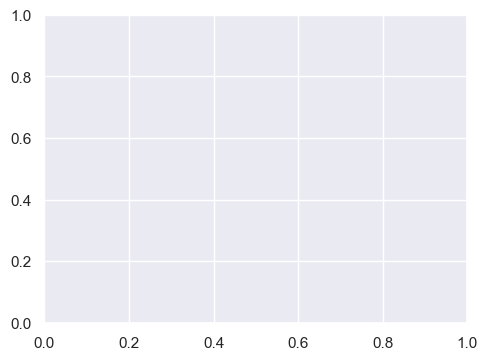

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='test')
plt.title('Loss')
plt.tight_layout()

plt.savefig('epoch_history_dcnn.png')
plt.show()

In [43]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()


NameError: name 'history' is not defined

394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step
total wrong validation predictions: 2930


              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1798
           1       0.98      1.00      0.99      1798
           2       0.68      0.55      0.61      1798
           3       0.88      0.84      0.86      1798
           4       0.63      0.61      0.62      1798
           5       0.87      0.87      0.87      1798
           6       0.63      0.76      0.69      1797

    accuracy                           0.77     12585
   macro avg       0.77      0.77      0.77     12585
weighted avg       0.77      0.77      0.77     12585



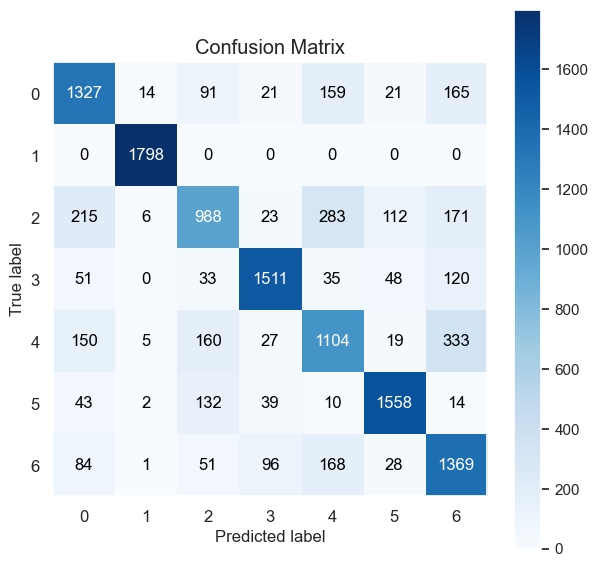

In [44]:
yhat_valid_probs = model.predict(X_valid)
yhat_valid_classes = yhat_valid_probs.argmax(axis=1)

scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid_classes, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid_classes)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid_classes))